In [6]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
%matplotlib inline
import time
from datetime import datetime
from geopy import distance

In [8]:
data=pd.read_csv('YourCabs (1).csv')
data

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [9]:
data.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


In [10]:
data.shape

(43431, 18)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [12]:
data.select_dtypes(include=['number']).columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id',
       'online_booking', 'mobile_site_booking', 'from_lat', 'from_long',
       'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [13]:
data.select_dtypes(exclude=['number']).columns

Index(['from_date', 'booking_created'], dtype='object')

In [14]:
data.Car_Cancellation.value_counts() # Target

Car_Cancellation
0    40299
1     3132
Name: count, dtype: int64

In [15]:
data.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

In [16]:
#prob 1: data imbalance
#prob 2:  Nan values

In [17]:
missing= data.isnull().sum()/len(data)*100

In [18]:
missing.sort_values(ascending=False)

to_city_id             96.343626
package_id             82.616104
from_city_id           62.365591
to_long                21.040271
to_lat                 21.040271
to_area_id             21.040271
from_long               0.214133
from_lat                0.214133
from_area_id            0.202620
id                      0.000000
booking_created         0.000000
from_date               0.000000
mobile_site_booking     0.000000
online_booking          0.000000
user_id                 0.000000
travel_type_id          0.000000
vehicle_model_id        0.000000
Car_Cancellation        0.000000
dtype: float64

In [19]:
# Here we can drop columns whose missing percentage is more than 70, but we might need some columns for further calculations, so we can keep them for now and handle them.

In [20]:
#We will use KNN Imputer to fill the NAN values with n_neighbor=5

In [21]:
# since we are using KNN, we need to perform Scaling first

In [22]:
def StandardScaling(data):
    ss=StandardScaler()
    
    data['to_city_id']=ss.fit_transform(data['to_city_id'].values.reshape(-1, 1))
    data['from_city_id']=ss.fit_transform(data['from_city_id'].values.reshape(-1, 1))
    data['to_long']=ss.fit_transform(data['to_long'].values.reshape(-1, 1))
    data['to_lat']=ss.fit_transform(data['to_lat'].values.reshape(-1, 1))
    data['to_area_id']=ss.fit_transform(data['to_area_id'].values.reshape(-1, 1))
    data['from_long']=ss.fit_transform(data['from_long'].values.reshape(-1, 1))
    data['from_lat']=ss.fit_transform(data['from_lat'].values.reshape(-1, 1))
    data['from_area_id']=ss.fit_transform(data['from_area_id'].values.reshape(-1, 1))
    
    return data


In [23]:
scaled_data = StandardScaling(data)

In [24]:
scaled_data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,-1.504112,-0.552853,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,-0.678574,0.606754,-0.875251,-0.075658,0
1,132513,21413,12,NaN,2,0.703669,-0.323216,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,-0.180968,1.904273,-0.872078,-0.217903,0
2,132514,22178,12,NaN,2,1.396726,0.909834,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,-0.526453,-0.157260,0.187491,-0.668747,0
3,132515,13034,12,NaN,2,0.127312,-0.677656,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,0.087618,-1.396435,-0.486567,-0.022726,0
4,132517,22180,12,NaN,2,1.549151,0.448064,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,-1.592057,0.701635,-0.637159,-0.622622,0


In [25]:
# Filling the NAN values

In [26]:
imputer= KNNImputer(n_neighbors=5)

In [27]:
scaled_data['to_city_id']= imputer.fit_transform(scaled_data['to_city_id'].values.reshape(-1, 1))

In [28]:
scaled_data['from_city_id']= imputer.fit_transform(scaled_data['from_city_id'].values.reshape(-1, 1))

In [29]:
scaled_data['to_long']= imputer.fit_transform(scaled_data['to_long'].values.reshape(-1, 1))

In [30]:
scaled_data['to_lat']= imputer.fit_transform(scaled_data['to_lat'].values.reshape(-1, 1))

In [31]:
scaled_data['to_area_id']= imputer.fit_transform(scaled_data['to_area_id'].values.reshape(-1, 1))

In [32]:
scaled_data['from_long']= imputer.fit_transform(scaled_data['from_long'].values.reshape(-1, 1))

In [33]:
scaled_data['from_lat']= imputer.fit_transform(scaled_data['from_lat'].values.reshape(-1, 1))

In [34]:
scaled_data['from_area_id']= imputer.fit_transform(scaled_data['from_area_id'].values.reshape(-1, 1))

In [35]:
data.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id               0
to_city_id                 0
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
dtype: int64

In [36]:
# checking for duplicates

In [37]:
scaled_data.duplicated().sum()

0

In [38]:
scaled_data.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,-1.504112,-0.552853,-3.129953e-16,5.005791e-17,01-01-2013 02:00,0,0,01-01-2013 01:39,-0.678574,0.606754,-0.875251,-0.075658,0
1,132513,21413,12,NaN,2,0.703669,-0.323216,-3.129953e-16,5.005791e-17,01-01-2013 09:00,0,0,01-01-2013 02:25,-0.180968,1.904273,-0.872078,-0.217903,0


In [39]:
#Handling outliers for numerical columns

In [40]:
numerical_columns = ['from_area_id', 'to_area_id', 'from_lat', 'from_long', 'to_lat', 'to_long']

In [ ]:
sns.boxplot(data=scaled_data[numerical_columns])

In [41]:
# Calculate IQR for each column
Q1 = scaled_data[numerical_columns].quantile(0.25)
Q3 = scaled_data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

In [42]:
# Identify outliers using the IQR method (values outside 1.5 * IQR)
outliers_iqr = ((scaled_data[numerical_columns] < (Q1 - 1.5 * IQR)) | (scaled_data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_iqr.sum()

13913

In [43]:
df = scaled_data[~outliers_iqr]  # excluding outliers

In [44]:
df.shape

(29518, 18)

<Axes: >

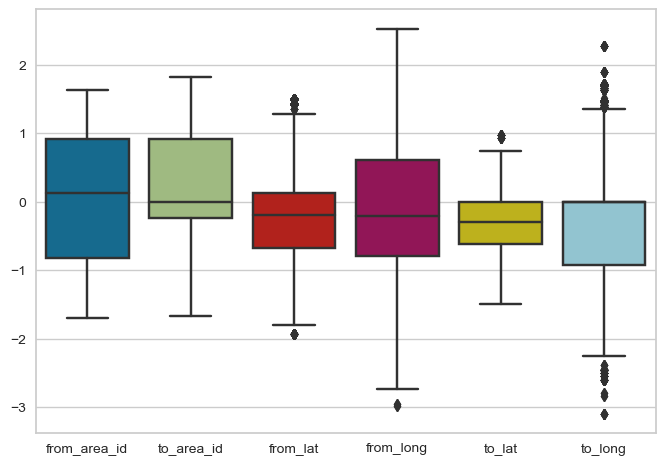

In [45]:
sns.boxplot(data=df[numerical_columns])

In [46]:
# Transforming the data

In [47]:
# Extracting time, date and other details

In [48]:
df['from_date_date'] =(pd.to_datetime(df['from_date'],format='mixed')).dt.strftime('%m/%d/%Y')
df['from_date_time'] = (pd.to_datetime(df['from_date'],format='mixed')).dt.strftime('%H:%M')
df['booking_created_date'] = (pd.to_datetime(df['booking_created'],format='mixed')).dt.strftime('%m/%d/%Y')
df['booking_created_time'] = (pd.to_datetime(df['booking_created'],format='mixed')).dt.strftime('%H:%M')
df['from_date_day'] = pd.to_datetime(df['from_date_date']).dt.day_name()
df['from_date_week'] =np.where((df['from_date_day']=='Saturday') | (df['from_date_day']=='Sunday'),'Weekend','Weekday')
df['booking_created_day'] = pd.to_datetime(df['booking_created_date']).dt.day_name()
df['booking_created_week'] = np.where((df['booking_created_day']=='Saturday') | (df['booking_created_day']=='Sunday'),'Weekend','Weekday')

In [49]:
df.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,to_long,Car_Cancellation,from_date_date,from_date_time,booking_created_date,booking_created_time,from_date_day,from_date_week,booking_created_day,booking_created_week
0,132512,22177,28,NaN,2,-1.504112,-0.552853,-3.129953e-16,5.005791e-17,01-01-2013 02:00,...,-0.075658,0,01/01/2013,02:00,01/01/2013,01:39,Tuesday,Weekday,Tuesday,Weekday
1,132513,21413,12,NaN,2,0.703669,-0.323216,-3.129953e-16,5.005791e-17,01-01-2013 09:00,...,-0.217903,0,01/01/2013,09:00,01/01/2013,02:25,Tuesday,Weekday,Tuesday,Weekday


In [50]:
# Finding Cancellation percentage between car_cancellation and from_area_id

In [51]:
total_cancellations = df['Car_Cancellation'].sum()


grouped = df.groupby('from_area_id')['Car_Cancellation'].sum()


percentage = (grouped / total_cancellations) * 100


percentage_df = percentage.reset_index(name='Cancellation_Percentage')

print(percentage_df)

     from_area_id  Cancellation_Percentage
0       -1.697025                 0.144823
1       -1.687498                 0.000000
2       -1.666063                 0.000000
3       -1.663682                 0.000000
4       -1.661300                 0.000000
..            ...                      ...
563      1.622982                 0.000000
564      1.625363                 0.000000
565      1.627745                 0.108617
566      1.630127                 0.325851
567      1.634890                 0.072411

[568 rows x 2 columns]


In [52]:
def categorize_percentage(percentage):
    if percentage == 0:
        return 'No Cancellation'
    elif percentage < 1:
        return 'Low Cancellation'
    elif 1 <= percentage < 5:
        return 'Med Cancellation'
    else:
        return 'High Cancellation'


percentage_df['Cancellation_Category'] = percentage_df['Cancellation_Percentage'].apply(categorize_percentage)

print(percentage_df)

     from_area_id  Cancellation_Percentage Cancellation_Category
0       -1.697025                 0.144823      Low Cancellation
1       -1.687498                 0.000000       No Cancellation
2       -1.666063                 0.000000       No Cancellation
3       -1.663682                 0.000000       No Cancellation
4       -1.661300                 0.000000       No Cancellation
..            ...                      ...                   ...
563      1.622982                 0.000000       No Cancellation
564      1.625363                 0.000000       No Cancellation
565      1.627745                 0.108617      Low Cancellation
566      1.630127                 0.325851      Low Cancellation
567      1.634890                 0.072411      Low Cancellation

[568 rows x 3 columns]


In [53]:
df['Cancellation_Category']=percentage_df['Cancellation_Category']

In [54]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,Car_Cancellation,from_date_date,from_date_time,booking_created_date,booking_created_time,from_date_day,from_date_week,booking_created_day,booking_created_week,Cancellation_Category
0,132512,22177,28,NaN,2,-1.504112,-0.552853,-3.129953e-16,5.005791e-17,01-01-2013 02:00,...,0,01/01/2013,02:00,01/01/2013,01:39,Tuesday,Weekday,Tuesday,Weekday,Low Cancellation
1,132513,21413,12,NaN,2,0.703669,-0.323216,-3.129953e-16,5.005791e-17,01-01-2013 09:00,...,0,01/01/2013,09:00,01/01/2013,02:25,Tuesday,Weekday,Tuesday,Weekday,No Cancellation
2,132514,22178,12,NaN,2,1.396726,0.909834,-3.129953e-16,5.005791e-17,01-01-2013 03:30,...,0,01/01/2013,03:30,01/01/2013,03:08,Tuesday,Weekday,Tuesday,Weekday,No Cancellation
3,132515,13034,12,NaN,2,0.127312,-0.677656,-3.129953e-16,5.005791e-17,01-01-2013 05:45,...,0,01/01/2013,05:45,01/01/2013,04:39,Tuesday,Weekday,Tuesday,Weekday,No Cancellation
4,132517,22180,12,NaN,2,1.549151,0.448064,-3.129953e-16,5.005791e-17,01-01-2013 09:00,...,0,01/01/2013,09:00,01/01/2013,07:53,Tuesday,Weekday,Tuesday,Weekday,No Cancellation


In [55]:
df.isnull().sum()

id                           0
user_id                      0
vehicle_model_id             0
package_id               22242
travel_type_id               0
from_area_id                 0
to_area_id                   0
from_city_id                 0
to_city_id                   0
from_date                    0
online_booking               0
mobile_site_booking          0
booking_created              0
from_lat                     0
from_long                    0
to_lat                       0
to_long                      0
Car_Cancellation             0
from_date_date               0
from_date_time               0
booking_created_date         0
booking_created_time         0
from_date_day                0
from_date_week               0
booking_created_day          0
booking_created_week         0
Cancellation_Category    29120
dtype: int64

In [56]:
df['Cancellation_Category'].value_counts()

Cancellation_Category
Low Cancellation    274
No Cancellation     114
Med Cancellation     10
Name: count, dtype: int64

In [57]:
df['Cancellation_Category'].isnull().sum()

29120

In [58]:
df['Cancellation_Category'].mode()

0    Low Cancellation
Name: Cancellation_Category, dtype: object

In [59]:
# Filling the NaN values with mode as it is a categorical column.

In [60]:
df['Cancellation_Category']=df['Cancellation_Category'].fillna('Low Cancellation')

In [61]:
df['Cancellation_Category'].isnull().sum()

0

In [62]:
# Calculating Distance

In [63]:
def cal_distance(from_lat,from_long,to_lat,to_long):
     return distance.distance((from_lat,from_long),(to_lat,to_long)).km

In [64]:
df['distance'] = df.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1)

In [65]:
# Dropping the Columns

In [66]:
df.drop(['from_lat','from_long','to_lat','to_long'],axis=1,inplace=True)

In [67]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,from_date_date,from_date_time,booking_created_date,booking_created_time,from_date_day,from_date_week,booking_created_day,booking_created_week,Cancellation_Category,distance
0,132512,22177,28,NaN,2,-1.504112,-0.552853,-3.129953e-16,5.005791e-17,01-01-2013 02:00,...,01/01/2013,02:00,01/01/2013,01:39,Tuesday,Weekday,Tuesday,Weekday,Low Cancellation,79.010668
1,132513,21413,12,NaN,2,0.703669,-0.323216,-3.129953e-16,5.005791e-17,01-01-2013 09:00,...,01/01/2013,09:00,01/01/2013,02:25,Tuesday,Weekday,Tuesday,Weekday,No Cancellation,248.281332
2,132514,22178,12,NaN,2,1.396726,0.909834,-3.129953e-16,5.005791e-17,01-01-2013 03:30,...,01/01/2013,03:30,01/01/2013,03:08,Tuesday,Weekday,Tuesday,Weekday,No Cancellation,97.334675
3,132515,13034,12,NaN,2,0.127312,-0.677656,-3.129953e-16,5.005791e-17,01-01-2013 05:45,...,01/01/2013,05:45,01/01/2013,04:39,Tuesday,Weekday,Tuesday,Weekday,No Cancellation,165.575489
4,132517,22180,12,NaN,2,1.549151,0.448064,-3.129953e-16,5.005791e-17,01-01-2013 09:00,...,01/01/2013,09:00,01/01/2013,07:53,Tuesday,Weekday,Tuesday,Weekday,No Cancellation,181.304818


In [68]:
# Calculating the Cancellation Percentage between the Car_Cancellation and distance

In [69]:
total_route_cancellations = df['Car_Cancellation'].sum()


grouped1 = df.groupby('distance')['Car_Cancellation'].sum()


percentage1 = (grouped1 / total_route_cancellations) * 100


percentage_df1 = percentage1.reset_index(name='Cancellation_route_Percentage')

print(percentage_df1)

          distance  Cancellation_route_Percentage
0     1.181203e-11                       0.072411
1     2.968617e-01                       0.036206
2     3.455274e-01                       0.072411
3     2.292642e+00                       0.000000
4     2.400710e+00                       0.000000
...            ...                            ...
9072  4.778199e+02                       0.000000
9073  4.790264e+02                       0.000000
9074  4.970819e+02                       0.000000
9075  5.127055e+02                       0.000000
9076  5.474823e+02                       0.000000

[9077 rows x 2 columns]


In [70]:
def categorize_percentage1(percentage1):
    if percentage1 == 0:
        return 'No Cancellation'
    elif percentage1 < 1:
        return 'Low Cancellation'
    elif 1 <= percentage1 < 5:
        return 'Med Cancellation'
    else:
        return 'High Cancellation'


percentage_df1['Cancellation_route_Category'] = percentage_df1['Cancellation_route_Percentage'].apply(categorize_percentage1)

print(percentage_df1)

          distance  Cancellation_route_Percentage Cancellation_route_Category
0     1.181203e-11                       0.072411            Low Cancellation
1     2.968617e-01                       0.036206            Low Cancellation
2     3.455274e-01                       0.072411            Low Cancellation
3     2.292642e+00                       0.000000             No Cancellation
4     2.400710e+00                       0.000000             No Cancellation
...            ...                            ...                         ...
9072  4.778199e+02                       0.000000             No Cancellation
9073  4.790264e+02                       0.000000             No Cancellation
9074  4.970819e+02                       0.000000             No Cancellation
9075  5.127055e+02                       0.000000             No Cancellation
9076  5.474823e+02                       0.000000             No Cancellation

[9077 rows x 3 columns]


In [71]:
df['Cancellation_route_Category']=percentage_df1['Cancellation_route_Category']

In [72]:
df['Cancellation_route_Category'].isnull().sum()

23361

In [73]:
df['Cancellation_route_Category'].mode()

0    No Cancellation
Name: Cancellation_route_Category, dtype: object

In [74]:
df['Cancellation_route_Category']=df['Cancellation_route_Category'].fillna('No Cancellation')

In [75]:
df['Cancellation_route_Category'].isnull().sum()

0

In [76]:
df['Cancellation_route_Category'].value_counts()

Cancellation_route_Category
No Cancellation     28235
Low Cancellation     1283
Name: count, dtype: int64

In [77]:
# Calculating the time difference between booking created and from date

In [78]:
a=pd.to_datetime(df['from_date'],format='mixed')-pd.to_datetime(df['booking_created'],format='mixed')
df['time_difference(sec)'] = a.dt.total_seconds()

In [79]:
df.drop(['from_date','booking_created'],axis=1,inplace=True)

In [80]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,...,booking_created_date,booking_created_time,from_date_day,from_date_week,booking_created_day,booking_created_week,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec)
0,132512,22177,28,NaN,2,-1.504112,-0.552853,-3.129953e-16,5.005791e-17,0,...,01/01/2013,01:39,Tuesday,Weekday,Tuesday,Weekday,Low Cancellation,79.010668,Low Cancellation,1260.0
1,132513,21413,12,NaN,2,0.703669,-0.323216,-3.129953e-16,5.005791e-17,0,...,01/01/2013,02:25,Tuesday,Weekday,Tuesday,Weekday,No Cancellation,248.281332,Low Cancellation,23700.0
2,132514,22178,12,NaN,2,1.396726,0.909834,-3.129953e-16,5.005791e-17,0,...,01/01/2013,03:08,Tuesday,Weekday,Tuesday,Weekday,No Cancellation,97.334675,Low Cancellation,1320.0
3,132515,13034,12,NaN,2,0.127312,-0.677656,-3.129953e-16,5.005791e-17,0,...,01/01/2013,04:39,Tuesday,Weekday,Tuesday,Weekday,No Cancellation,165.575489,No Cancellation,3960.0
4,132517,22180,12,NaN,2,1.549151,0.448064,-3.129953e-16,5.005791e-17,0,...,01/01/2013,07:53,Tuesday,Weekday,Tuesday,Weekday,No Cancellation,181.304818,No Cancellation,4020.0


In [81]:
# Encoding the data and dropping the columns

In [82]:
df['is_weekend']= pd.get_dummies(df['from_date_week']).astype('int')['Weekend']

In [83]:
df.drop(['from_date_week','from_date_day'],axis=1,inplace=True)

In [84]:
df['is_weekend_booking']= pd.get_dummies(df['booking_created_week']).astype('int')['Weekend']

In [85]:
df.drop(['booking_created_week','booking_created_day'],axis=1,inplace=True)

In [86]:
df.drop(['id','user_id'],axis=1,inplace=True)

In [87]:
df.drop(['vehicle_model_id'],axis=1,inplace=True)

In [88]:
df.sample()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,from_date_date,from_date_time,booking_created_date,booking_created_time,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
24900,1.0,3,-1.363595,-7.914948e-17,0.072875,5.005791e-17,1,0,0,07/28/2013,14:45,07/28/2013,13:06,Low Cancellation,102.948064,No Cancellation,5940.0,1,1


In [89]:
le=LabelEncoder()
df['Cancellation_Category'] = le.fit_transform(df['Cancellation_Category'])
df['Cancellation_route_Category'] = le.fit_transform(df['Cancellation_route_Category'])

In [90]:
df.drop(['booking_created_time','from_date_time','from_date_date','booking_created_date'],axis=1,inplace=True)

In [91]:
df.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
0,NaN,2,-1.504112,-0.552853,-3.129953e-16,5.005791e-17,0,0,0,0,79.010668,0,1260.0,0,0
1,NaN,2,0.703669,-0.323216,-3.129953e-16,5.005791e-17,0,0,0,2,248.281332,0,23700.0,0,0
2,NaN,2,1.396726,0.909834,-3.129953e-16,5.005791e-17,0,0,0,2,97.334675,0,1320.0,0,0
3,NaN,2,0.127312,-0.677656,-3.129953e-16,5.005791e-17,0,0,0,2,165.575489,1,3960.0,0,0
4,NaN,2,1.549151,0.448064,-3.129953e-16,5.005791e-17,0,0,0,2,181.304818,1,4020.0,0,0


In [92]:
pip install --upgrade scikit-learn imblearn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\neha singh\anaconda3\lib\site-packages (1.4.2)
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/55/0403bf2031250ac982c8053397889fbc5a3a2b3798b913dae4f51c3af6a4/scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl (11.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Neha Singh\\anaconda3\\Lib\\site-packages\\~-learn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [93]:
pip install -U imbalanced-learn

In [94]:
conda install -c glemaitre imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [--no-plugins] [-V] COMMAND ...
conda-script.py: error: unrecognized arguments: imbalanced-learn


In [95]:
df.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
0,NaN,2,-1.504112,-0.552853,-3.129953e-16,5.005791e-17,0,0,0,0,79.010668,0,1260.0,0,0
1,NaN,2,0.703669,-0.323216,-3.129953e-16,5.005791e-17,0,0,0,2,248.281332,0,23700.0,0,0
2,NaN,2,1.396726,0.909834,-3.129953e-16,5.005791e-17,0,0,0,2,97.334675,0,1320.0,0,0
3,NaN,2,0.127312,-0.677656,-3.129953e-16,5.005791e-17,0,0,0,2,165.575489,1,3960.0,0,0
4,NaN,2,1.549151,0.448064,-3.129953e-16,5.005791e-17,0,0,0,2,181.304818,1,4020.0,0,0


Dividing data into 3 parts:



In [96]:
# 1.travel_type_id=1

In [97]:
df1=df.copy()

In [98]:
id_1 = df1[df1['travel_type_id']==1]

In [99]:
id_1.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
6,NaN,1,-0.341871,-7.914948e-17,7.287489e-02,0.791381,0,0,0,0,119.452543,1,1440.0,0,0
17,NaN,1,1.592020,-7.914948e-17,-3.129953e-16,-0.732734,1,0,0,2,114.500818,0,934980.0,1,0
24,NaN,1,-0.475243,-7.914948e-17,7.287489e-02,-0.732734,0,0,0,0,69.863229,0,323400.0,1,0
158,NaN,1,-1.377885,-7.914948e-17,-1.194151e+01,1.673763,1,0,0,0,98.500880,1,76260.0,0,0
216,NaN,1,0.960886,-7.914948e-17,-3.129953e-16,-0.732734,1,0,0,2,157.284813,1,165480.0,1,0


In [100]:
id_1.shape

(1323, 15)

In [101]:
# Dropping package_id column

In [102]:
id_1.drop(columns='package_id', inplace=True)

In [103]:
id_1.drop(columns='travel_type_id', inplace=True)

In [104]:
id_1.drop(columns=['from_area_id','to_area_id','from_city_id','to_city_id'],inplace=True)

In [105]:
# scaling on distance and time_difference

In [106]:
ss=StandardScaler()

In [107]:
id_1['distance']=ss.fit_transform(id_1['distance'].values.reshape(-1, 1))

In [108]:
id_1['time_difference(sec)']=ss.fit_transform(id_1['time_difference(sec)'].values.reshape(-1, 1))

In [109]:
id_1.head()

,online_booking,mobile_site_booking,Car_Cancellation,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
6,0,0,0,0,0.284347,1,-0.455957,0,0
17,1,0,0,2,0.195320,0,2.204159,1,0
24,0,0,0,0,-0.607226,0,0.461465,1,0
158,1,0,0,0,-0.092345,1,-0.242758,0,0
216,1,0,0,2,0.964539,1,0.011473,1,0


<Axes: xlabel='is_weekend'>

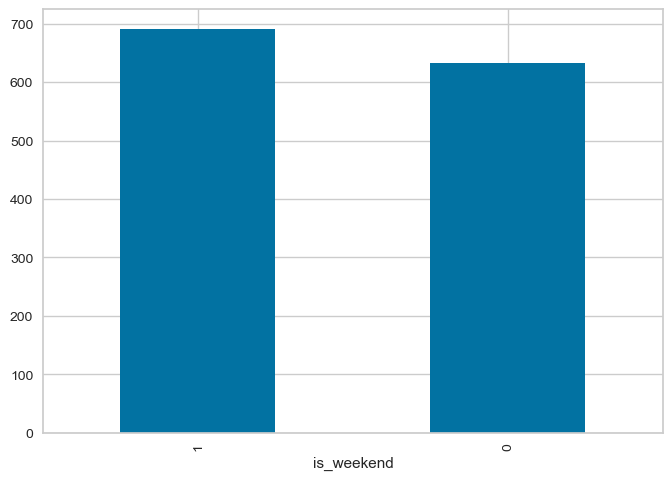

In [110]:
id_1['is_weekend'].value_counts().plot.bar()

<Axes: xlabel='is_weekend_booking'>

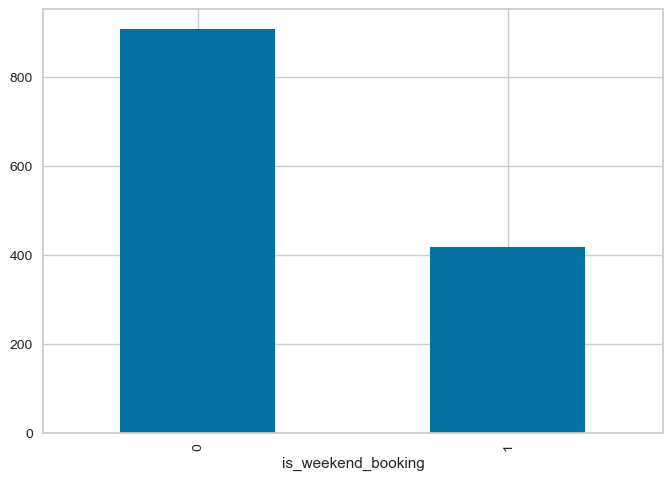

In [111]:
id_1['is_weekend_booking'].value_counts().plot.bar()

<Axes: xlabel='Cancellation_route_Category'>

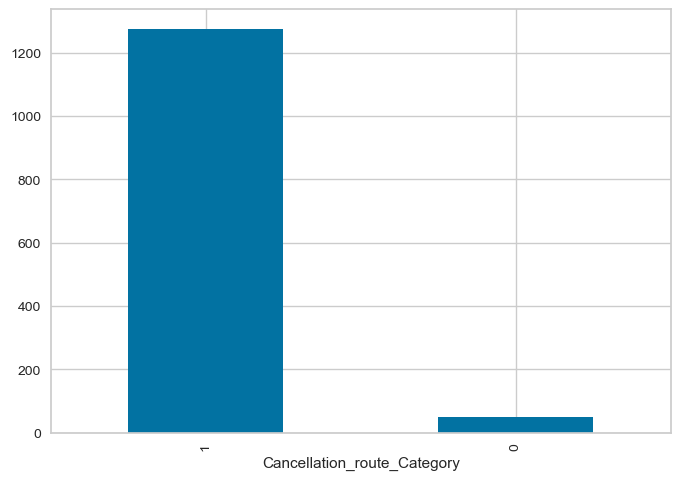

In [112]:
id_1['Cancellation_route_Category'].value_counts().plot.bar()


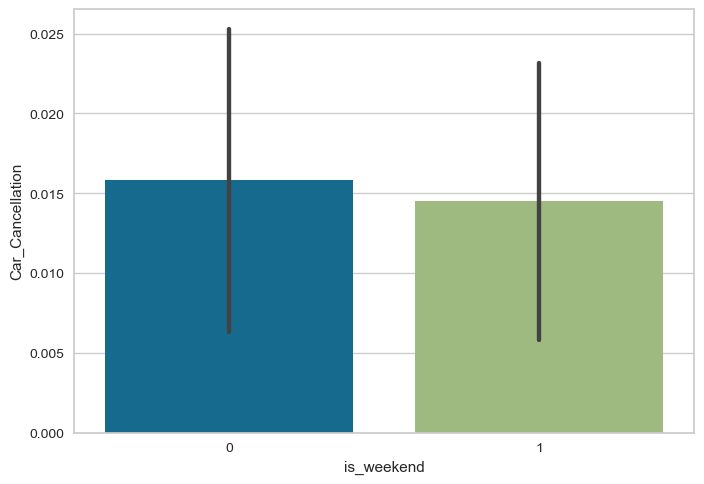

In [113]:
sns.barplot(x='is_weekend', y='Car_Cancellation', data=id_1)
plt.show()

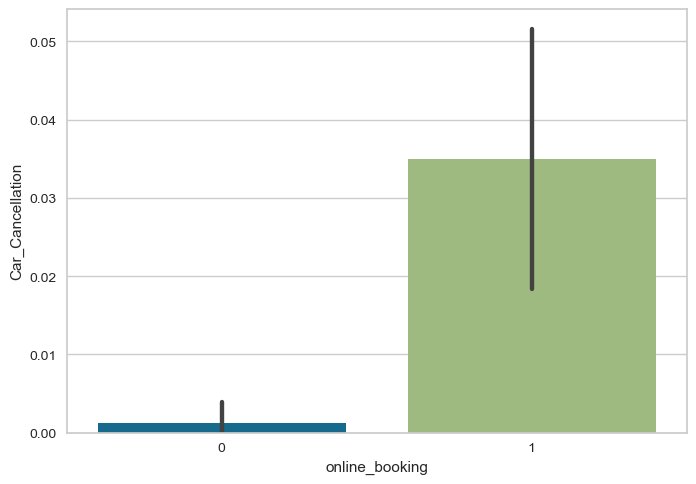

In [114]:
sns.barplot(x='online_booking', y='Car_Cancellation', data=id_1)
plt.show()

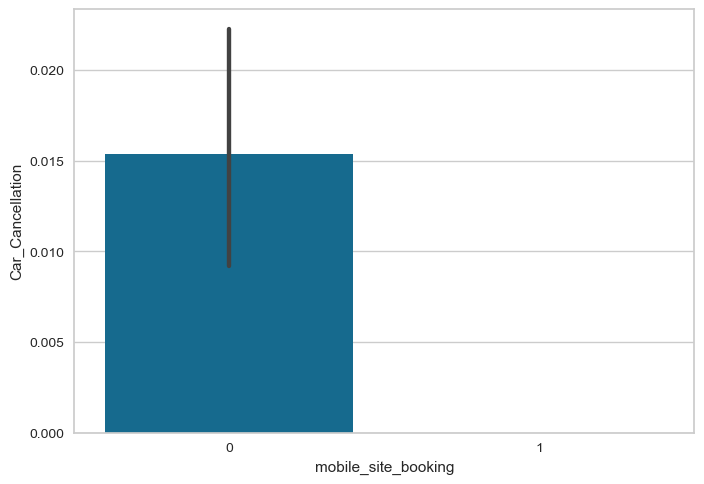

In [115]:
sns.barplot(x='mobile_site_booking', y='Car_Cancellation', data=id_1)
plt.show()

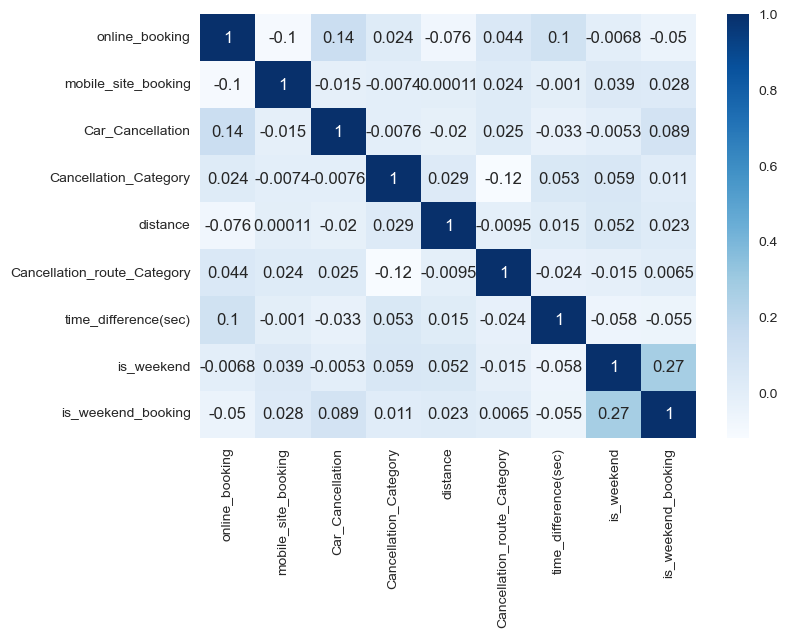

In [116]:
sns.heatmap(id_1.corr(),annot=True,cmap='Blues')
plt.show()

In [117]:
# Extracting Features and Targets

In [118]:
x=id_1.drop(columns='Car_Cancellation')
y=id_1['Car_Cancellation']

In [119]:
# Balancing the data

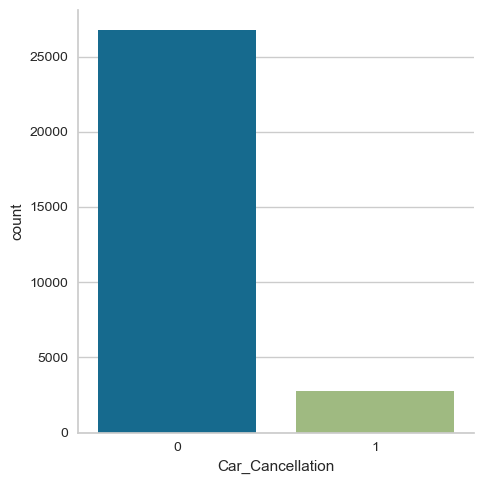

In [120]:
no_cancel = df[df['Car_Cancellation']=='0'].shape[0]
yes_cancel = df[df['Car_Cancellation']=='1'].shape[0]

sns.catplot(data=df, x='Car_Cancellation',kind='count') # the target class is highly imbalance

In [121]:
import imblearn

In [122]:
from imblearn.over_sampling import SMOTE

In [123]:
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x,y)

In [124]:
y_smote.value_counts() # The data is balanced now

Car_Cancellation
0    1303
1    1303
Name: count, dtype: int64

In [125]:
# Splitting the data

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=32)

In [127]:
x_train

,online_booking,mobile_site_booking,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
196,1,0,0,-0.378386,1,-0.031269,0,0
787,0,0,0,-0.138228,1,-0.239681,0,0
2493,1,0,0,0.075106,1,-0.401389,1,0
993,1,0,0,0.284347,1,-0.324653,0,0
2086,0,0,0,-0.054756,1,-0.377435,1,1
...,...,...,...,...,...,...,...,...
510,0,0,0,0.215898,1,-0.359189,1,0
252,0,0,0,-0.396077,1,-0.296956,1,1
2136,1,0,0,-1.498023,1,-0.403421,0,0
1334,1,0,0,-0.069591,1,-0.405519,1,1


In [128]:
y_train

196     0
787     0
2493    1
993     0
2086    1
       ..
510     0
252     0
2136    1
1334    1
1579    1
Name: Car_Cancellation, Length: 2084, dtype: int64

In [129]:
x_test

,online_booking,mobile_site_booking,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
2518,1,0,0,0.429966,1,-0.382245,1,1
94,0,0,0,-0.152039,0,0.221253,0,1
1477,1,0,0,0.078304,1,-0.358133,0,0
561,0,0,0,-0.048228,1,-0.085466,0,1
1115,1,0,0,0.370920,1,-0.210445,1,0
...,...,...,...,...,...,...,...,...
2523,0,0,0,0.283224,1,-0.341544,0,1
1627,1,0,0,-0.064021,1,0.489271,1,0
232,0,0,0,0.370920,1,-0.437493,0,0
799,1,0,0,0.444132,1,-0.308411,1,0


In [130]:
y_test

2518    1
94      0
1477    1
561     0
1115    0
       ..
2523    1
1627    1
232     0
799     0
1077    0
Name: Car_Cancellation, Length: 522, dtype: int64

In [131]:
# Model 1: Logistic Regression

In [132]:
model1=LogisticRegression()

In [133]:
model1.fit(x_train,y_train)

LogisticRegression()

In [134]:
y_train_pred=model1.predict(x_train)
y_test_pred=model1.predict(x_test)

In [135]:
y_train_score=accuracy_score(y_train,y_train_pred)
print('train score: ', y_train_score)

train score:  0.8258157389635317


In [136]:
y_test_score=accuracy_score(y_test,y_test_pred)
print('test score: ', y_test_score)

test score:  0.8218390804597702


In [137]:
report_train=classification_report(y_train,y_train_pred)

In [138]:
print(report_train)

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1034
           1       0.78      0.91      0.84      1050

    accuracy                           0.83      2084
   macro avg       0.83      0.83      0.82      2084
weighted avg       0.83      0.83      0.82      2084



In [139]:
report_test=classification_report(y_test,y_test_pred)

In [140]:
print(report_test)

              precision    recall  f1-score   support

           0       0.91      0.72      0.81       269
           1       0.76      0.92      0.83       253

    accuracy                           0.82       522
   macro avg       0.84      0.82      0.82       522
weighted avg       0.84      0.82      0.82       522



<Axes: >

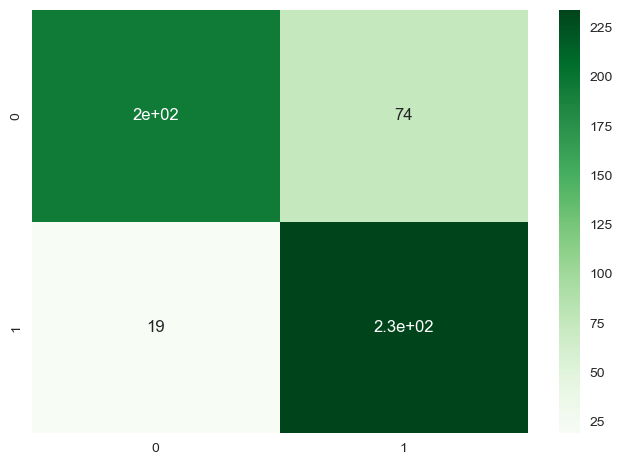

In [141]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,cmap='Greens')

In [142]:
#finding Prob

In [143]:
y_test_prob=model1.predict_proba(x_test)[:,1]
y_test_prob

array([8.17156848e-01, 2.35139556e-02, 7.23957334e-01, 1.95024198e-01,
       4.72882288e-01, 7.34175541e-01, 8.60941645e-02, 8.08353100e-01,
       9.08594801e-01, 7.25599440e-01, 8.18278457e-01, 8.17041284e-01,
       6.91310902e-01, 2.20091650e-01, 7.30796906e-01, 2.81035773e-02,
       7.25017932e-01, 1.11364213e-02, 9.19856632e-01, 8.13670305e-01,
       5.05034470e-01, 2.44507989e-01, 7.25889758e-01, 4.94253960e-01,
       9.12302232e-01, 8.99077553e-02, 7.26174491e-01, 2.38441665e-01,
       3.34965614e-02, 4.65271732e-02, 7.27761977e-01, 5.04078012e-01,
       1.27522661e-01, 7.72350580e-02, 1.26960778e-01, 2.09721890e-01,
       1.27129952e-01, 5.13121174e-01, 9.10926296e-01, 2.80796490e-05,
       9.10522112e-01, 7.25488853e-01, 7.35083292e-01, 1.30577239e-01,
       7.22528924e-01, 2.66706689e-01, 8.17210797e-01, 8.11163189e-01,
       7.44245370e-01, 7.98116414e-01, 7.25525683e-01, 3.58518407e-02,
       7.76944286e-01, 9.10622841e-01, 5.33663335e-01, 7.25889758e-01,
      

In [144]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)

In [145]:
#finding auc

In [146]:
roc_auc=auc(fpr,tpr)
roc_auc

0.8877558517125351

In [147]:
# plot ROC

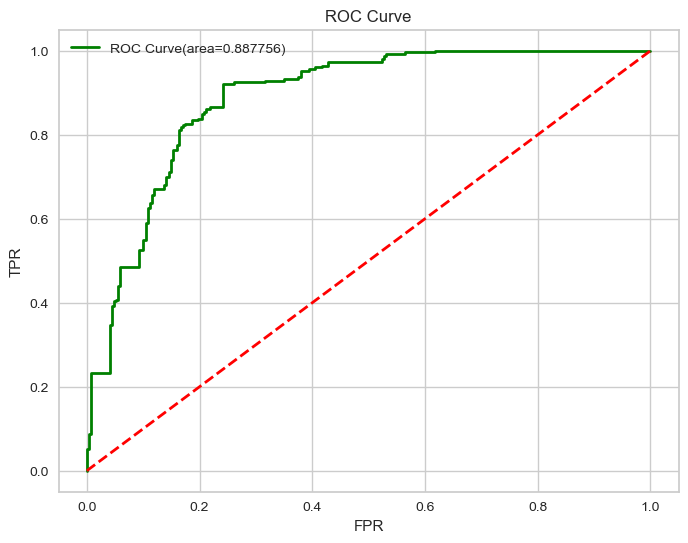

In [148]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, color='green',lw=2,label=f'ROC Curve(area={roc_auc:3f})')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.legend()
plt.show()

In [149]:
# Model 2_rf: Random Forest

In [150]:
model2_rf=RandomForestClassifier(random_state=32)
model2_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=32)

In [151]:
y_train_pred_rf=model2_rf.predict(x_train)
y_test_pred_rf=model2_rf.predict(x_test)

In [152]:
train_acc_score_rf=accuracy_score(y_train,y_train_pred_rf)
test_acc_score_rf=accuracy_score(y_test,y_test_pred_rf)

In [153]:
train_acc_score_rf

0.9995201535508638

In [154]:
test_acc_score_rf

0.9616858237547893

In [155]:
#using grid search cv using parameters

In [156]:
params={'max_depth': [4,5,6], 'bootstrap': [True,False], 'max_features':['sqrt', 'log2',None],'criterion': ['gini','entropy']}

In [157]:
cv_rf=GridSearchCV(model2_rf, cv=5, param_grid=params, n_jobs=-1)
cv_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=32), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['sqrt', 'log2', None]})

In [158]:
best_params=cv_rf.best_params_
best_params

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None}

In [159]:
best_model2_rf=RandomForestClassifier(**best_params,random_state=32)

In [160]:
best_model2_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=None,
                       random_state=32)

In [161]:
best_y_train_pred=best_model2_rf.predict(x_train)
best_y_test_pred=best_model2_rf.predict(x_test)

In [162]:
best_y_train_score=accuracy_score(y_train,best_y_train_pred)
print('best train accuracy: ' , best_y_train_score)

best train accuracy:  0.9424184261036468


In [163]:
best_y_test_score=accuracy_score(y_test,best_y_test_pred)
print('best test accuracy: ' , best_y_test_score)

best test accuracy:  0.9252873563218391


In [164]:
# 1.travel_type_id=2

In [165]:
df2=df.copy()

In [166]:
id_2 = df2[df2['travel_type_id']==2]

In [167]:
id_2.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
0,NaN,2,-1.504112,-0.552853,-3.129953e-16,5.005791e-17,0,0,0,0,79.010668,0,1260.0,0,0
1,NaN,2,0.703669,-0.323216,-3.129953e-16,5.005791e-17,0,0,0,2,248.281332,0,23700.0,0,0
2,NaN,2,1.396726,0.909834,-3.129953e-16,5.005791e-17,0,0,0,2,97.334675,0,1320.0,0,0
3,NaN,2,0.127312,-0.677656,-3.129953e-16,5.005791e-17,0,0,0,2,165.575489,1,3960.0,0,0
4,NaN,2,1.549151,0.448064,-3.129953e-16,5.005791e-17,0,0,0,2,181.304818,1,4020.0,0,0


In [168]:
id_2.shape

(20919, 15)

In [169]:
id_2['package_id'].isnull().sum()

20919

In [170]:
#we can drop package_id and travel_type_id

In [171]:
id_2.drop(columns=['package_id','travel_type_id'],inplace=True)

In [172]:
id_2.sample()

,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
37246,-1.554126,-0.210894,0.072875,5.005791e-17,1,0,1,0,146.249087,1,6780.0,0,0


In [173]:
id_2.drop(columns=['from_area_id','to_area_id','from_city_id','to_city_id'],inplace=True)

In [174]:
id_2.head()

,online_booking,mobile_site_booking,Car_Cancellation,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
0,0,0,0,0,79.010668,0,1260.0,0,0
1,0,0,0,2,248.281332,0,23700.0,0,0
2,0,0,0,2,97.334675,0,1320.0,0,0
3,0,0,0,2,165.575489,1,3960.0,0,0
4,0,0,0,2,181.304818,1,4020.0,0,0


<Axes: xlabel='is_weekend'>

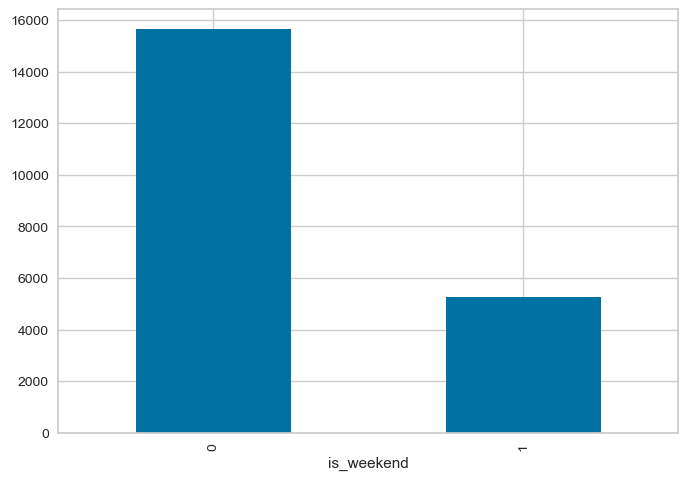

In [175]:
id_2['is_weekend'].value_counts().plot.bar()

<Axes: xlabel='is_weekend_booking'>

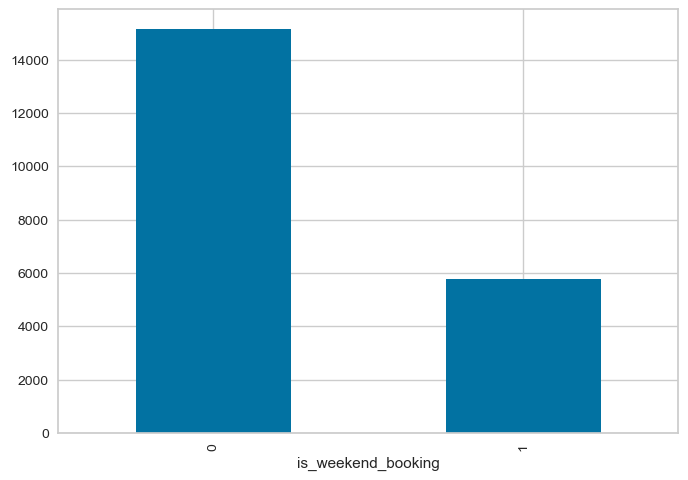

In [176]:
id_2['is_weekend_booking'].value_counts().plot.bar()

<Axes: xlabel='Cancellation_route_Category'>

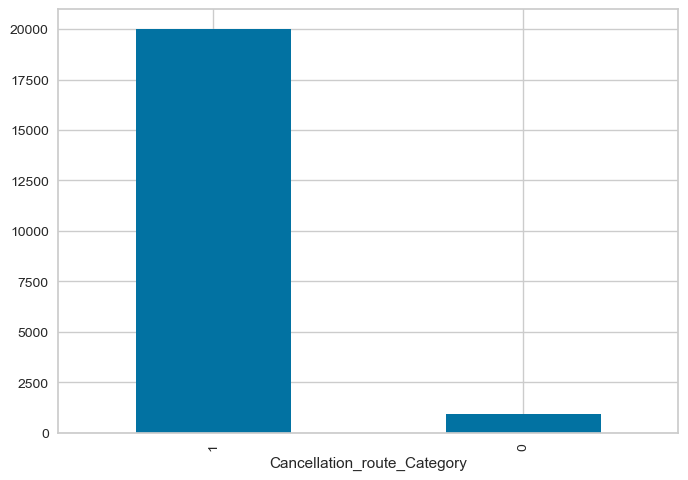

In [177]:
id_2['Cancellation_route_Category'].value_counts().plot.bar()

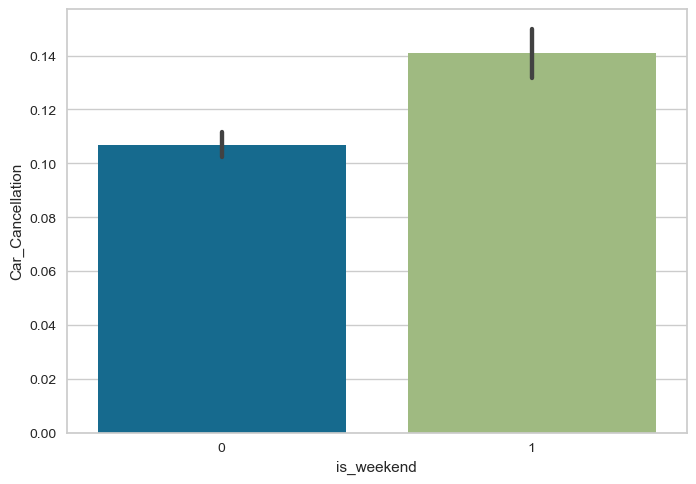

In [178]:
sns.barplot(x='is_weekend', y='Car_Cancellation', data=id_2)
plt.show()

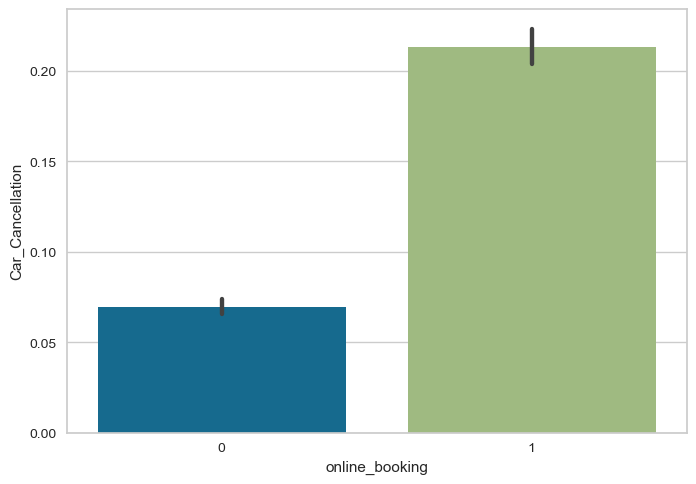

In [179]:
sns.barplot(x='online_booking', y='Car_Cancellation', data=id_2)
plt.show()

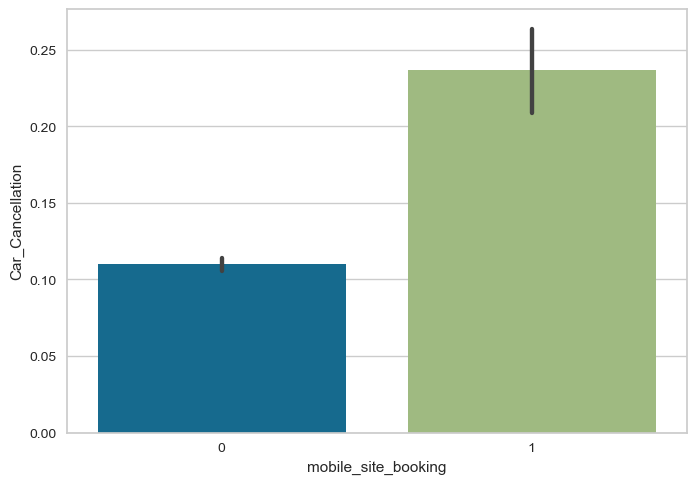

In [180]:
sns.barplot(x='mobile_site_booking', y='Car_Cancellation', data=id_2)
plt.show()

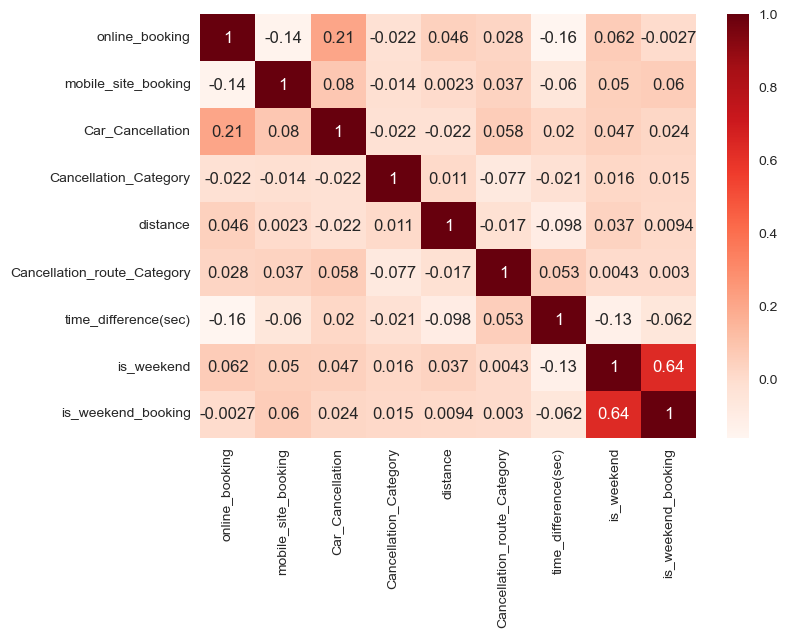

In [181]:
sns.heatmap(id_2.corr(),annot=True,cmap='Reds')
plt.show()

In [182]:
id_2.head(10)

,online_booking,mobile_site_booking,Car_Cancellation,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
0,0,0,0,0,79.010668,0,1260.0,0,0
1,0,0,0,2,248.281332,0,23700.0,0,0
2,0,0,0,2,97.334675,0,1320.0,0,0
3,0,0,0,2,165.575489,1,3960.0,0,0
4,0,0,0,2,181.304818,1,4020.0,0,0
5,0,0,0,0,285.168520,0,52140.0,0,0
7,0,0,0,0,186.157139,1,4860.0,0,0
9,0,0,0,2,150.891147,0,4260.0,0,0
10,0,0,0,2,149.779544,1,3900.0,0,0
11,0,0,0,0,100.453104,1,9960.0,0,0


In [183]:
# scaling on distance and time_difference

In [184]:
ss=StandardScaler()

In [185]:
id_2['distance']=ss.fit_transform(id_2['distance'].values.reshape(-1, 1))

In [186]:
id_2['time_difference(sec)']=ss.fit_transform(id_2['time_difference(sec)'].values.reshape(-1, 1))

In [187]:
id_2.head()

,online_booking,mobile_site_booking,Car_Cancellation,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
0,0,0,0,0,-0.881877,0,-0.370735,0,0
1,0,0,0,2,1.280606,0,-0.316464,0,0
2,0,0,0,2,-0.647782,0,-0.370590,0,0
3,0,0,0,2,0.224014,1,-0.364205,0,0
4,0,0,0,2,0.424961,1,-0.364060,0,0


In [188]:
# Extracting Features and Targets

In [189]:
x2=id_2.drop(columns='Car_Cancellation')
y2=id_2['Car_Cancellation']

In [190]:
x2.head()

,online_booking,mobile_site_booking,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
0,0,0,0,-0.881877,0,-0.370735,0,0
1,0,0,2,1.280606,0,-0.316464,0,0
2,0,0,2,-0.647782,0,-0.370590,0,0
3,0,0,2,0.224014,1,-0.364205,0,0
4,0,0,2,0.424961,1,-0.364060,0,0


In [191]:
y2.value_counts() # the target class is highly imbalance

Car_Cancellation
0    18507
1     2412
Name: count, dtype: int64

In [192]:
# Balancing the data

In [193]:
import imblearn

In [194]:
from imblearn.over_sampling import SMOTE

In [195]:
smote=SMOTE()
x2_smote,y2_smote=smote.fit_resample(x2,y2)

In [196]:
y2_smote.value_counts() # The data is balanced now

Car_Cancellation
0    18507
1    18507
Name: count, dtype: int64

In [197]:
# Splitting the data

In [198]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2_smote,y2_smote,test_size=0.2,random_state=32)

In [199]:
# Model 3: Logistic Regression
model3=LogisticRegression()
model3.fit(x2_train,y2_train)
y2_train_pred=model3.predict(x2_train)
y2_test_pred=model3.predict(x2_test)

In [200]:
y2_train_score=accuracy_score(y2_train,y2_train_pred)
print('train2 score: ', y2_train_score)

train2 score:  0.6987605957245618


In [201]:
y2_test_score=accuracy_score(y2_test,y2_test_pred)
print('test2 score: ', y2_test_score)

test2 score:  0.696609482642172


In [202]:
report_train2=classification_report(y2_train,y2_train_pred)
print(report_train2)

              precision    recall  f1-score   support

           0       0.71      0.66      0.69     14826
           1       0.69      0.73      0.71     14785

    accuracy                           0.70     29611
   macro avg       0.70      0.70      0.70     29611
weighted avg       0.70      0.70      0.70     29611



<Axes: >

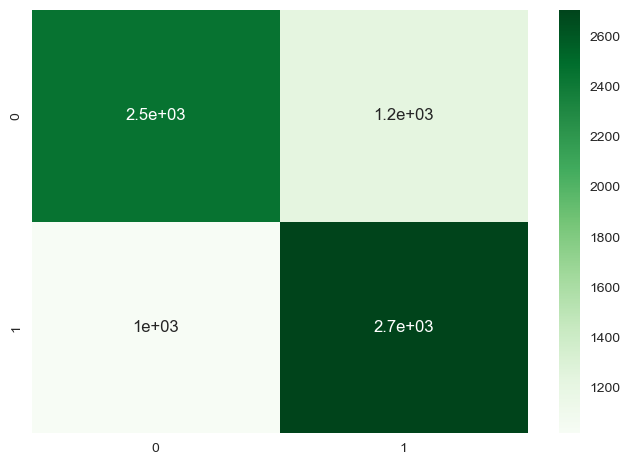

In [203]:
sns.heatmap(confusion_matrix(y2_test,y2_test_pred),annot=True,cmap='Greens')

In [204]:
#finding Prob

In [205]:
y2_test_prob=model3.predict_proba(x2_test)[:,1]
y2_test_prob
fpr2,tpr2,thresholds2=roc_curve(y2_test,y2_test_prob)

In [206]:
#finding auc

In [207]:
roc_auc2=auc(fpr2,tpr2)
roc_auc2

0.7048766258497204

In [208]:
# Plot ROC

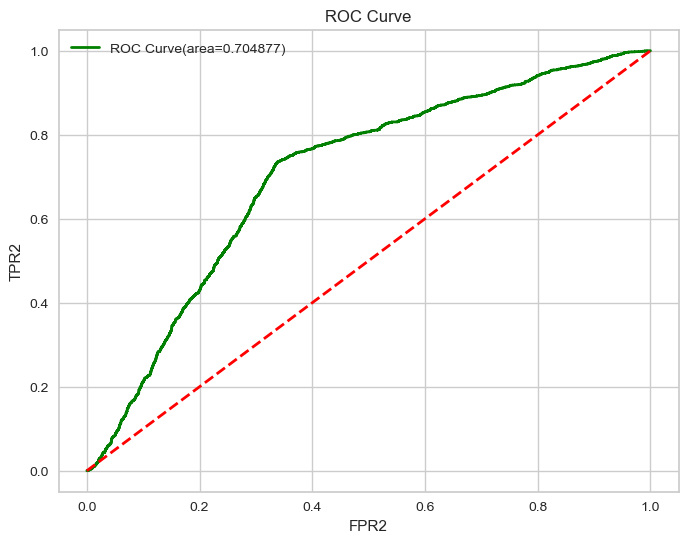

In [209]:
plt.figure(figsize=(8,6))
plt.plot(fpr2,tpr2, color='green',lw=2,label=f'ROC Curve(area={roc_auc2:3f})')
plt.xlabel('FPR2')
plt.ylabel('TPR2')
plt.title('ROC Curve')
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.legend()
plt.show()

In [210]:
# Model 3_rf: Random Forest

In [211]:
model3_rf=RandomForestClassifier(random_state=32)
model3_rf.fit(x2_train,y2_train)
y2_train_pred_rf=model3_rf.predict(x2_train)
y2_test_pred_rf=model3_rf.predict(x2_test)

In [212]:
train2_acc_score_rf=accuracy_score(y2_train,y2_train_pred_rf)
test2_acc_score_rf=accuracy_score(y2_test,y2_test_pred_rf)

In [213]:
train2_acc_score_rf

0.999797372598021

In [214]:
test2_acc_score_rf

0.8233148723490477

In [215]:
#using grid search cv using parameters

In [216]:
params2={'max_depth': [4,5,6], 'bootstrap': [True,False], 'max_features':['sqrt', 'log2',None],'criterion': ['gini','entropy']}

In [217]:
cv_rf2=GridSearchCV(model3_rf, cv=5, param_grid=params2, n_jobs=-1)
cv_rf2.fit(x2_train,y2_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=32), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['sqrt', 'log2', None]})

In [218]:
best_params2=cv_rf2.best_params_
best_params2

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': None}

In [219]:
best_model3_rf=RandomForestClassifier(**best_params2,random_state=32)

In [220]:
best_model3_rf.fit(x2_train,y2_train)
best2_y_train_pred=best_model3_rf.predict(x2_train)
best2_y_test_pred=best_model3_rf.predict(x2_test)

In [221]:
best2_y_train_score=accuracy_score(y2_train,best2_y_train_pred)
print('best2 train accuracy: ' , best2_y_train_score)

best2 train accuracy:  0.7365506061936442


In [222]:
best2_y_test_score=accuracy_score(y2_test,best2_y_test_pred)
print('best2 test accuracy: ' , best2_y_test_score)

best2 test accuracy:  0.7288936917465892


In [223]:
# 3.travel_type_id=3

In [224]:
df3=df.copy()

In [225]:
id_3 = df3[df3['travel_type_id']==3]

In [226]:
id_3.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
8,2.0,3,-0.634813,-7.914948e-17,-3.129953e-16,5.005791e-17,0,0,0,0,70.960068,0,22560.0,0,0
20,2.0,3,-0.580035,-7.914948e-17,-3.129953e-16,5.005791e-17,0,0,0,0,46.464538,1,5880.0,0,0
23,1.0,3,1.361001,-7.914948e-17,-3.129953e-16,5.005791e-17,0,0,0,0,32.040148,1,6660.0,0,0
34,1.0,3,1.449122,-7.914948e-17,-3.129953e-16,5.005791e-17,1,0,0,0,148.405265,1,9300.0,0,0
47,2.0,3,-1.363595,-7.914948e-17,-3.129953e-16,5.005791e-17,0,0,0,0,102.948064,1,26580.0,0,0


In [227]:
id_3.shape


(7276, 15)

In [228]:
id_3['package_id'].value_counts()

package_id
1.0    3458
2.0    2483
6.0     502
4.0     370
3.0     365
7.0      93
5.0       5
Name: count, dtype: int64

In [229]:
id_3['package_id'].isnull().sum()

0

<Axes: xlabel='package_id'>

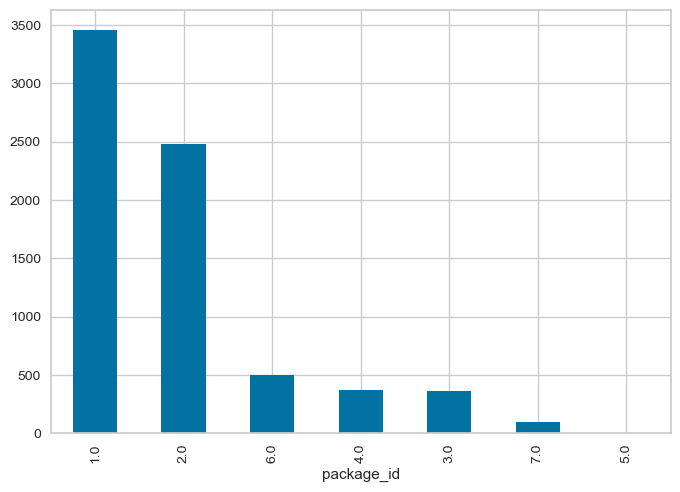

In [230]:
id_3['package_id'].value_counts().plot.bar()

In [231]:
id_3.sample()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
29640,4.0,3,-0.341871,-7.914948e-17,-3.129953e-16,5.005791e-17,1,0,0,0,119.452543,1,70740.0,1,1


In [232]:
id_3.drop(columns=['from_area_id','to_area_id','from_city_id','to_city_id','travel_type_id'],inplace=True)

In [233]:
id_3.head()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
8,2.0,0,0,0,0,70.960068,0,22560.0,0,0
20,2.0,0,0,0,0,46.464538,1,5880.0,0,0
23,1.0,0,0,0,0,32.040148,1,6660.0,0,0
34,1.0,1,0,0,0,148.405265,1,9300.0,0,0
47,2.0,0,0,0,0,102.948064,1,26580.0,0,0


<Axes: >

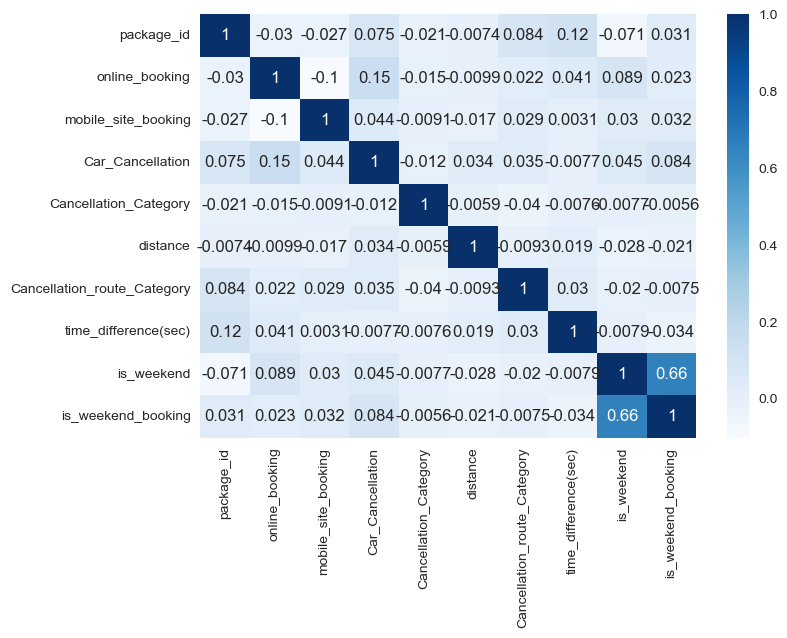

In [234]:
sns.heatmap(id_3.corr(),annot=True,cmap='Blues')

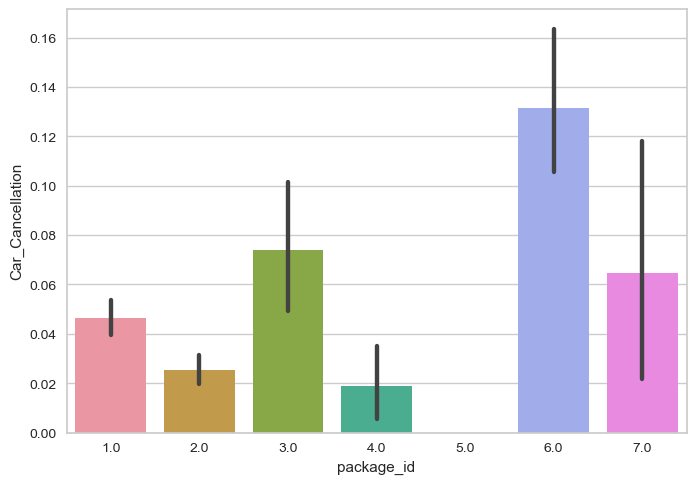

In [235]:
sns.barplot(x='package_id', y='Car_Cancellation', data=id_3)
plt.show()

<Axes: xlabel='is_weekend'>

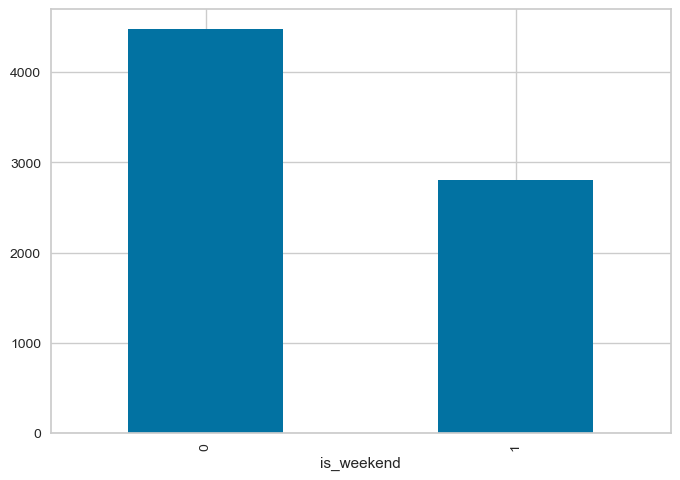

In [236]:
id_3['is_weekend'].value_counts().plot.bar()

<Axes: xlabel='is_weekend_booking'>

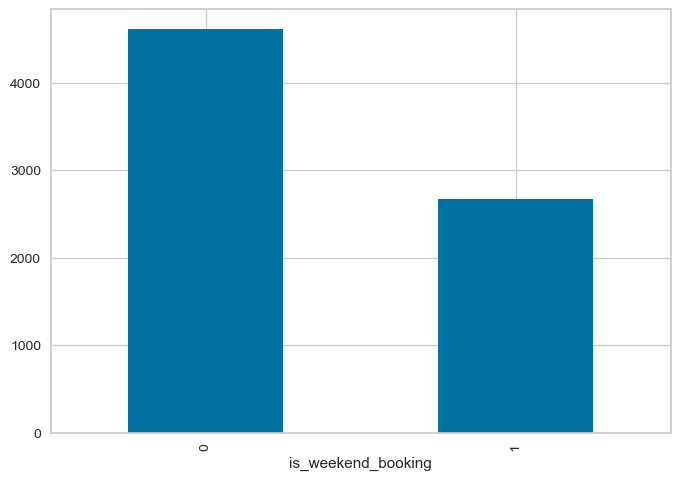

In [237]:
id_3['is_weekend_booking'].value_counts().plot.bar()

<Axes: xlabel='Cancellation_route_Category'>

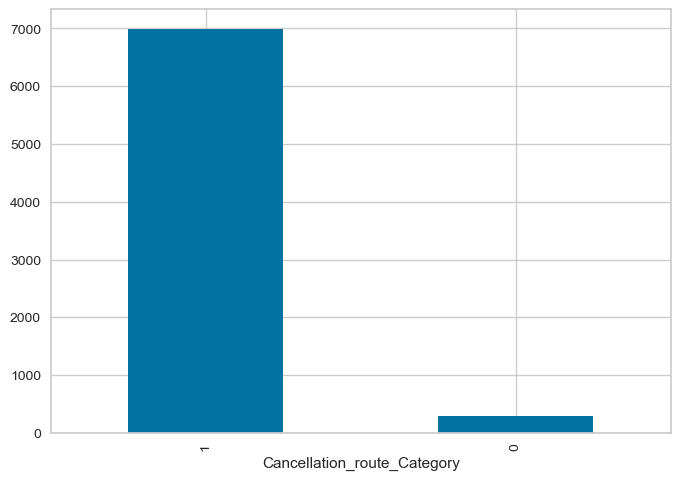

In [238]:
id_3['Cancellation_route_Category'].value_counts().plot.bar()

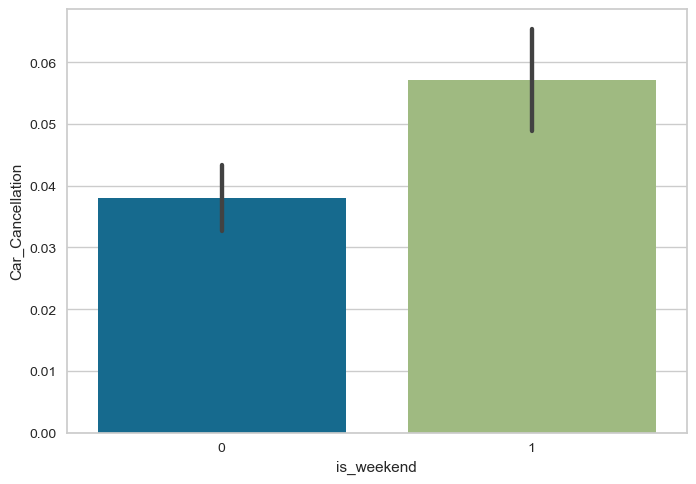

In [239]:
sns.barplot(x='is_weekend', y='Car_Cancellation', data=id_3)
plt.show()

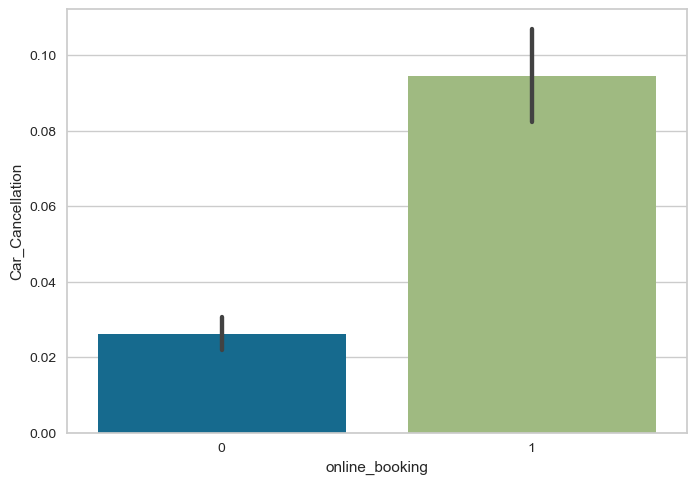

In [240]:
sns.barplot(x='online_booking', y='Car_Cancellation', data=id_3)
plt.show()

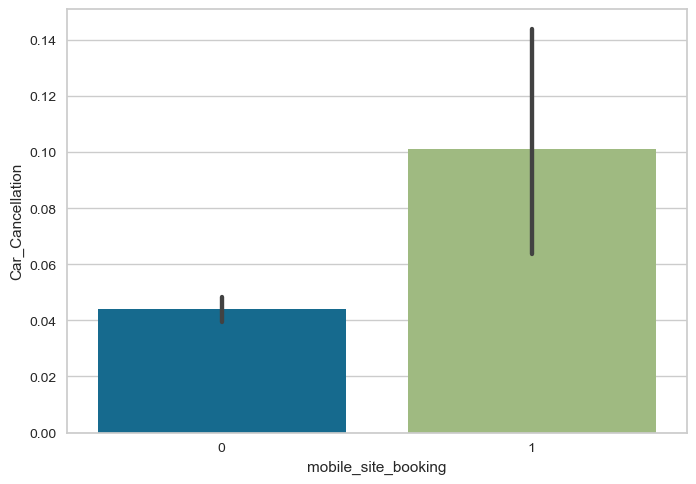

In [241]:
sns.barplot(x='mobile_site_booking', y='Car_Cancellation', data=id_3)
plt.show()

In [242]:
# scaling on distance and time_difference

In [243]:
ss=StandardScaler()

In [244]:
id_3['distance']=ss.fit_transform(id_3['distance'].values.reshape(-1, 1))

In [245]:
id_3['time_difference(sec)']=ss.fit_transform(id_3['time_difference(sec)'].values.reshape(-1, 1))

In [246]:
id_3.head()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,Cancellation_Category,distance,Cancellation_route_Category,time_difference(sec),is_weekend,is_weekend_booking
8,2.0,0,0,0,0,-0.893240,0,-0.200644,0,0
20,2.0,0,0,0,0,-1.343991,1,-0.321850,0,0
23,1.0,0,0,0,0,-1.609420,1,-0.316182,0,0
34,1.0,1,0,0,0,0.531858,1,-0.296999,0,0
47,2.0,0,0,0,0,-0.304617,1,-0.171433,0,0


In [247]:
# Extracting Features and Targets

In [248]:
x3=id_3.drop(columns='Car_Cancellation')
y3=id_3['Car_Cancellation']

In [249]:
y3.value_counts() # the target class is highly imbalance

Car_Cancellation
0    6946
1     330
Name: count, dtype: int64

In [250]:
# Balancing the data

In [251]:
import imblearn

In [252]:
from imblearn.over_sampling import SMOTE

In [253]:
smote=SMOTE()
x3_smote,y3_smote=smote.fit_resample(x3,y3)

In [254]:
# Splitting the data

In [255]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3_smote,y3_smote,test_size=0.2,random_state=32)

In [256]:
# Model 4: Logistic Regression
model4=LogisticRegression()
model4.fit(x3_train,y3_train)
y3_train_pred=model4.predict(x3_train)
y3_test_pred=model4.predict(x3_test)

In [257]:
y3_train_score=accuracy_score(y3_train,y3_train_pred)
print('train3 score: ', y3_train_score)

train3 score:  0.698551246288131


In [258]:
y3_test_score=accuracy_score(y3_test,y3_test_pred)
print('test3 score: ', y3_test_score)

test3 score:  0.7070888808924073


In [259]:
report_train3=classification_report(y3_train,y3_train_pred)
print(report_train3)

              precision    recall  f1-score   support

           0       0.71      0.68      0.69      5569
           1       0.69      0.72      0.70      5544

    accuracy                           0.70     11113
   macro avg       0.70      0.70      0.70     11113
weighted avg       0.70      0.70      0.70     11113



<Axes: >

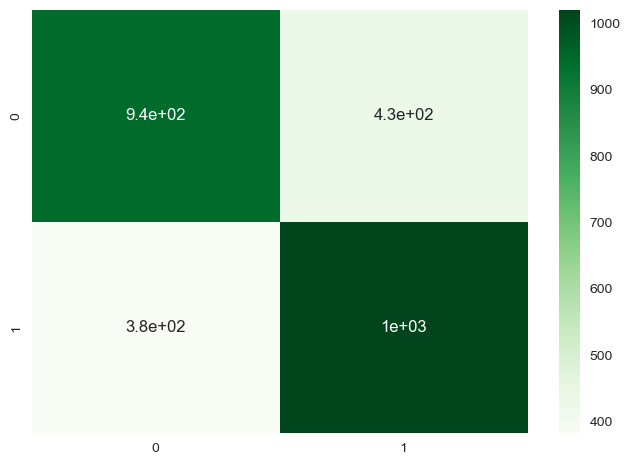

In [260]:
sns.heatmap(confusion_matrix(y3_test,y3_test_pred),annot=True,cmap='Greens')

In [261]:
#finding Prob

In [262]:
y3_test_prob=model4.predict_proba(x3_test)[:,1]
y3_test_prob
fpr3,tpr3,thresholds3=roc_curve(y3_test,y3_test_prob)

In [263]:
#finding auc

In [264]:
roc_auc3=auc(fpr3,tpr3)
roc_auc3

0.7399174019478347

In [265]:
# Plot ROC

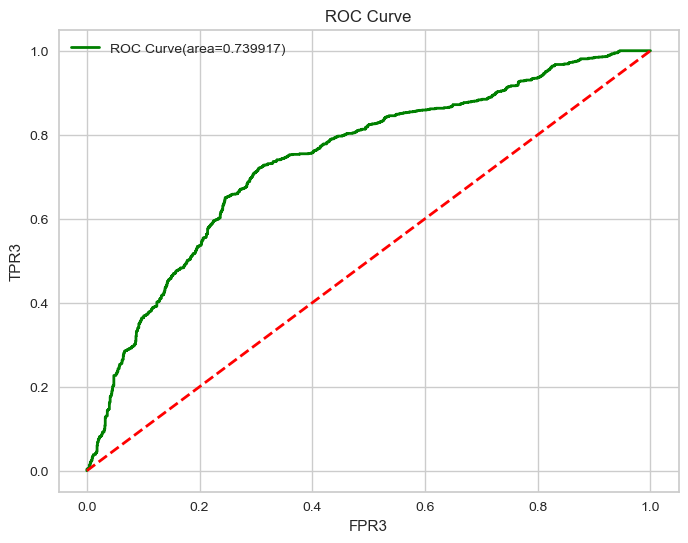

In [266]:
plt.figure(figsize=(8,6))
plt.plot(fpr3,tpr3, color='green',lw=2,label=f'ROC Curve(area={roc_auc3:3f})')
plt.xlabel('FPR3')
plt.ylabel('TPR3')
plt.title('ROC Curve')
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.legend()
plt.show()

In [267]:
# Model 4_rf: Random Forest

In [268]:
model4_rf=RandomForestClassifier(random_state=32)
model4_rf.fit(x3_train,y3_train)
y3_train_pred_rf=model4_rf.predict(x3_train)
y3_test_pred_rf=model4_rf.predict(x3_test)

In [269]:
train3_acc_score_rf=accuracy_score(y3_train,y3_train_pred_rf)
test3_acc_score_rf=accuracy_score(y3_test,y3_test_pred_rf)

In [270]:
train3_acc_score_rf

0.9996400611895978

In [271]:
test3_acc_score_rf

0.8949262324577186

In [272]:
#using grid search cv using parameters

In [273]:
params3={'max_depth': [4,5,6], 'bootstrap': [True,False], 'max_features':['sqrt', 'log2',None],'criterion': ['gini','entropy']}

In [274]:
cv_rf3=GridSearchCV(model4_rf, cv=5, param_grid=params3, n_jobs=-1)
cv_rf3.fit(x3_train,y3_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=32), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['sqrt', 'log2', None]})

In [275]:
best_params3=cv_rf3.best_params_
best_params3

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': None}

In [276]:
best_model4_rf=RandomForestClassifier(**best_params3,random_state=32)

In [277]:
best_model4_rf.fit(x3_train,y3_train)
best3_y_train_pred=best_model4_rf.predict(x3_train)
best3_y_test_pred=best_model4_rf.predict(x3_test)

In [278]:
best3_y_train_score=accuracy_score(y3_train,best3_y_train_pred)
print('best3 train accuracy: ' , best3_y_train_score)

best3 train accuracy:  0.7702690542607756


In [279]:
best3_y_test_score=accuracy_score(y3_test,best3_y_test_pred)
print('best3 test accuracy: ' , best3_y_test_score)

best3 test accuracy:  0.7639438646995322


In [280]:
# Summarising the petrformance of Models

In [281]:
pip install pycaret

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Neha Singh\\anaconda3\\Lib\\site-packages\\~~learn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.




  Obtaining dependency information for scikit-learn>1.4.0 from https://files.pythonhosted.org/packages/79/3d/02d5d3ed359498fec3abdf65407d3c07e3b8765af17464969055aaec5171/scikit_learn-1.4.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.4.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.2-cp311-cp311-win_amd64.whl (10.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1


In [282]:
from pycaret.classification import *

In [ ]:
# For id_1, where Travel_type_id_1 is used, following are the best models:

In [283]:
sum_clf=setup(data=id_1, target='Car_Cancellation',pca=False,session_id=123,use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

,Description,Value
0,Session id,123
1,Target,Car_Cancellation
2,Target type,Binary
3,Original data shape,"(1323, 9)"
4,Transformed data shape,"(1323, 9)"
5,Transformed train set shape,"(926, 9)"
6,Transformed test set shape,"(397, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

In [284]:
# compare different models
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9849,0.7767,0.0000,0.0000,0.0000,0.0000,0.0000,0.0370
knn,K Neighbors Classifier,0.9849,0.5366,0.0000,0.0000,0.0000,0.0000,0.0000,0.1260
svm,SVM - Linear Kernel,0.9849,0.7739,0.0000,0.0000,0.0000,0.0000,0.0000,0.0350
ridge,Ridge Classifier,0.9849,0.7860,0.0000,0.0000,0.0000,0.0000,0.0000,0.0550
lda,Linear Discriminant Analysis,0.9849,0.7866,0.0000,0.0000,0.0000,0.0000,0.0000,0.0370
dummy,Dummy Classifier,0.9849,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0600
rf,Random Forest Classifier,0.9795,0.6923,0.0000,0.0000,0.0000,-0.0059,-0.0059,0.4360
lightgbm,Light Gradient Boosting Machine,0.9795,0.7559,0.0000,0.0000,0.0000,-0.0052,-0.0054,2.8680
et,Extra Trees Classifier,0.9784,0.5977,0.0000,0.0000,0.0000,-0.0073,-0.0075,0.4140
ada,Ada Boost Classifier,0.9773,0.7245,0.0000,0.0000,0.0000,-0.0080,-0.0081,0.1770


In [ ]:
# For id_2, where Travel_type_id_2 is used, following are the best models:

In [285]:
sum2_clf=setup(data=id_2, target='Car_Cancellation',pca=False,session_id=123,use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

,Description,Value
0,Session id,123
1,Target,Car_Cancellation
2,Target type,Binary
3,Original data shape,"(20919, 9)"
4,Transformed data shape,"(20919, 9)"
5,Transformed train set shape,"(14643, 9)"
6,Transformed test set shape,"(6276, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

In [286]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8857,0.7805,0.0948,0.5333,0.1603,0.1296,0.1881,1.9640
gbc,Gradient Boosting Classifier,0.8852,0.7809,0.0391,0.5376,0.0723,0.0576,0.1194,1.4490
lr,Logistic Regression,0.8847,0.7149,0.0000,0.0000,0.0000,-0.0001,-0.0009,0.0590
svm,SVM - Linear Kernel,0.8847,0.6605,0.0000,0.0000,0.0000,0.0000,0.0000,0.0690
ridge,Ridge Classifier,0.8847,0.7161,0.0000,0.0000,0.0000,0.0000,0.0000,0.0420
dummy,Dummy Classifier,0.8847,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0610
lda,Linear Discriminant Analysis,0.8846,0.7161,0.0000,0.0000,0.0000,-0.0003,-0.0019,0.0510
ada,Ada Boost Classifier,0.8839,0.7666,0.0136,0.4078,0.0261,0.0187,0.0545,0.5190
rf,Random Forest Classifier,0.8745,0.7448,0.1824,0.4030,0.2504,0.1925,0.2110,0.6040
knn,K Neighbors Classifier,0.8696,0.6865,0.1410,0.3447,0.1996,0.1418,0.1591,0.2810


In [ ]:
# For id_3, where Travel_type_id_3 is used, following are the best models:

In [ ]:
sum3_clf=setup(data=id_3, target='Car_Cancellation',pca=False,session_id=123,use_gpu=True)

In [287]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8857,0.7805,0.0948,0.5333,0.1603,0.1296,0.1881,1.6520
gbc,Gradient Boosting Classifier,0.8852,0.7809,0.0391,0.5376,0.0723,0.0576,0.1194,1.1810
lr,Logistic Regression,0.8847,0.7149,0.0000,0.0000,0.0000,-0.0001,-0.0009,0.0610
svm,SVM - Linear Kernel,0.8847,0.6605,0.0000,0.0000,0.0000,0.0000,0.0000,0.0540
ridge,Ridge Classifier,0.8847,0.7161,0.0000,0.0000,0.0000,0.0000,0.0000,0.0370
dummy,Dummy Classifier,0.8847,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0540
lda,Linear Discriminant Analysis,0.8846,0.7161,0.0000,0.0000,0.0000,-0.0003,-0.0019,0.0470
ada,Ada Boost Classifier,0.8839,0.7666,0.0136,0.4078,0.0261,0.0187,0.0545,0.3790
rf,Random Forest Classifier,0.8745,0.7448,0.1824,0.4030,0.2504,0.1925,0.2110,0.5690
knn,K Neighbors Classifier,0.8696,0.6865,0.1410,0.3447,0.1996,0.1418,0.1591,0.2570
